<a href="https://colab.research.google.com/github/songhyun7597/ITB2022/blob/main/%ED%86%B5%EC%8B%A0%EC%82%AC_%EC%9D%B4%ED%83%88_%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.7 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=04bab866fbe494ca778a1bdab7aa63ef8d2165be028be6adf0f03321b8e8d297
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 5.2 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [3]:
import mglearn 

In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns      
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IT와비즈니스혁신/ITB기말과제/WA_Fn-UseC_-Telco-Customer-Churn.csv")

customerID : 소비자의 식별자
gender : 성별
SeniorCitizen : 노인인지의 여부
Partner : 배우자의 유무
Dependents : 자녀의 유무
tenure : 고객의 가입 기간 (개월 수)
PhoneService : 휴대폰 서비스를 가입 했는지의 여부
MultipleLines : 여러 개의 통신선을 서비스 받고 있는지의 여부 (Yes, No, No phone service) / 휴대폰 서비스를 가입한 고객만 해당됨.
InternetService : 인터넷 서비스 제공자 (DSL, Fiber optic, No)
OnlineSecurity : 온라인 보안 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
OnlineBackup : 온라인 백업 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
DeviceProtection 기기 보호 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
TechSupport : 기술 서포트 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
StreamingTV : TV 스트리밍 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
StreamingMovies : 영화 스트리밍 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
Contract : 계약 유형 (Month-to-month, One year, Two year)
PaperlessBilling : 전자 고지서 여부
PaymentMethod : 요금 지불 방법 (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
MonthlyCharges : 매달 고객에게 청구되는 금액
TotalCharges : 고객에게 청구된 총 금액
Churn : 지난 한 달 내에 떠난 고객인지의 여부

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#데이터 전처리

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#필요없는 칼럼 삭제
data = data.drop(["customerID"], axis=1)

In [10]:
#TotalCharges 실수형으로 변경
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [11]:
data["SeniorCitizen"] = data["SeniorCitizen"].astype("object") 

In [12]:
#칼럼 별 변수 확인
def unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

In [13]:
unique_col_values(data)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [14]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [15]:
print(data["Churn"].value_counts())
#2.7:1 비율

No     5174
Yes    1869
Name: Churn, dtype: int64


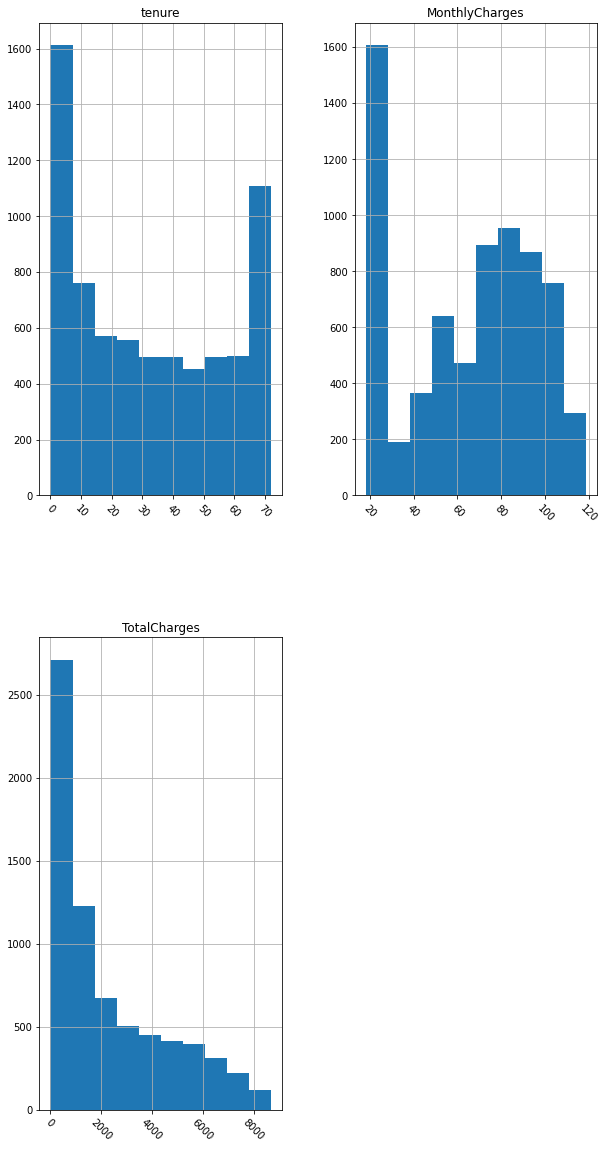

In [16]:
data.hist(figsize=(10,20), xrot=-45)
plt.show()

###gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


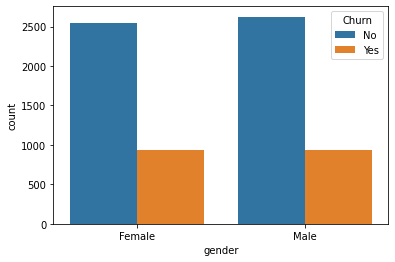

In [66]:
sns.countplot("gender", data=data,hue="Churn")

성별 간의 이탈률 차이는 없는 것으로 보임

###SeniorCitizen

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


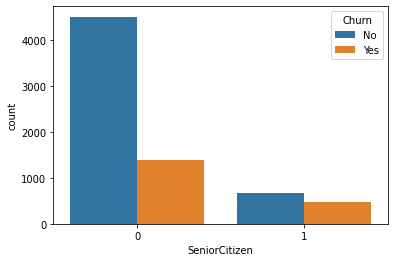

In [65]:
sns.countplot("SeniorCitizen", data=data,hue="Churn")

노인일수록 이탈률이 높음

###Partner

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


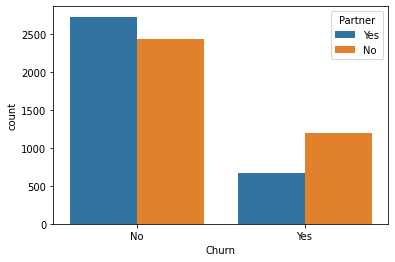

In [67]:
sns.countplot("Churn", data=data,hue="Partner")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


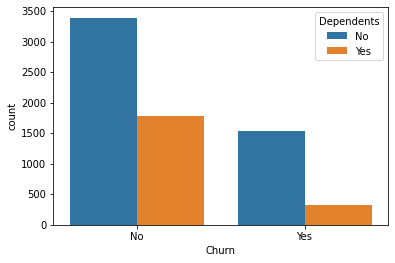

In [74]:
sns.countplot("Churn", data=data,hue="Dependents")

Text(0.5, 1.0, 'Dependents feature')

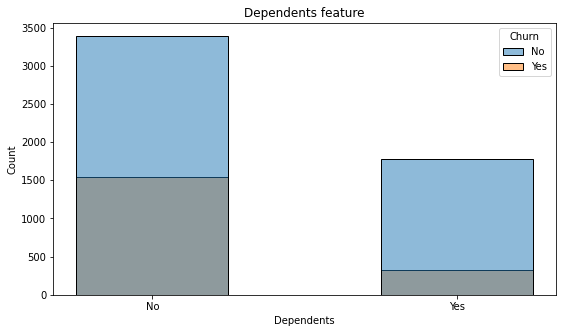

In [82]:
plt.figure(figsize=(9,5))
sns.histplot(data=data,x="Dependents",hue='Churn', shrink=.5)
plt.title('Dependents feature')

In [72]:
print(data["Family"].value_counts())

Single           3280
Family           1749
Couple           1653
Single parent     361
Name: Family, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


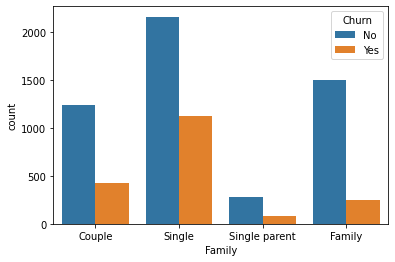

In [73]:
sns.countplot("Family", data=data,hue="Churn")

Partner가 있는 사람이 Partner가 없는 사람에 비해 이탈률이 낮음 -> Partner가 없을수록 이탈하는 경향이 있다.

Dependents가 있는 사람이 없는 사람에 비해 이탈률이 낮음 -> Dependents가 없을수록 이탈하는 경향이 있다.

Family(Partner有 / Defendents有)의 이탈률 비중이 제일 적고, Single(Partner無 / Defendents無)의 이탈률이 가장 높음

*통신사 결합 상품의 영향/가족결합혜택 때문이라 예상됨

###회사에서 제공하는 서비스
('PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


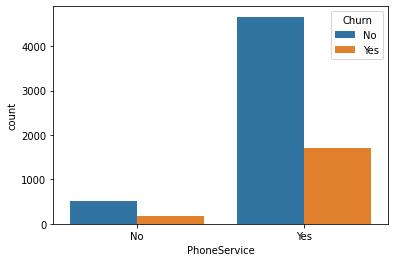

In [76]:
sns.countplot("PhoneService", data=data,hue="Churn")

Text(0.5, 1.0, 'PhoneService feature')

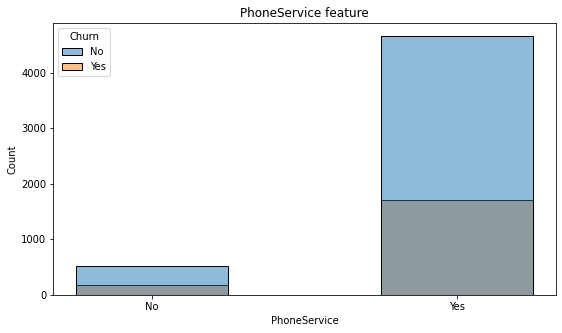

In [86]:
plt.figure(figsize=(9,5))
sns.histplot(data=data,x="PhoneService",hue='Churn', shrink=.5)
plt.title('PhoneService feature')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


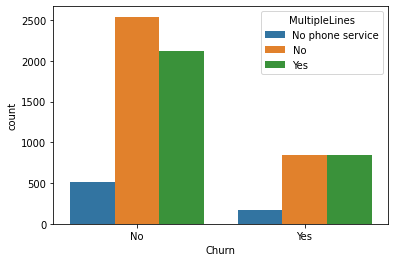

In [22]:
sns.countplot("Churn", data=data,hue="MultipleLines")

ㄴ

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


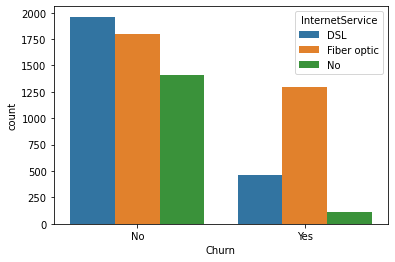

In [23]:
sns.countplot("Churn", data=data,hue="InternetService")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


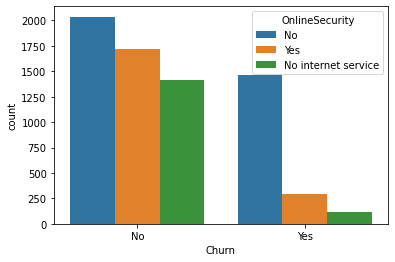

In [24]:
sns.countplot("Churn", data=data,hue="OnlineSecurity")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


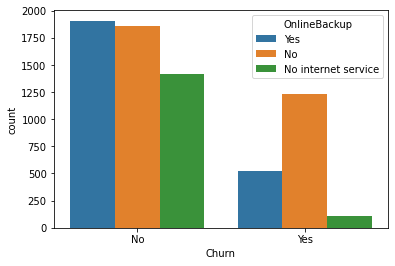

In [25]:
sns.countplot("Churn", data=data,hue="OnlineBackup")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


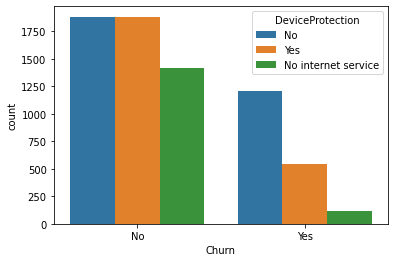

In [26]:
sns.countplot("Churn", data=data,hue="DeviceProtection")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


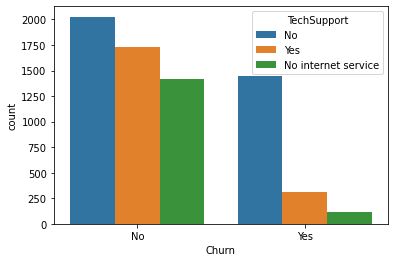

In [27]:
sns.countplot("Churn", data=data,hue="TechSupport")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


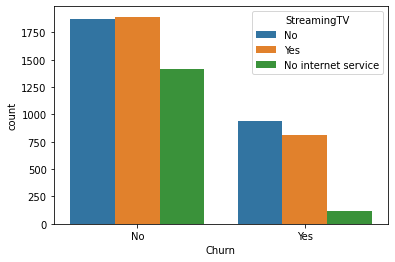

In [28]:
sns.countplot("Churn", data=data,hue="StreamingTV")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


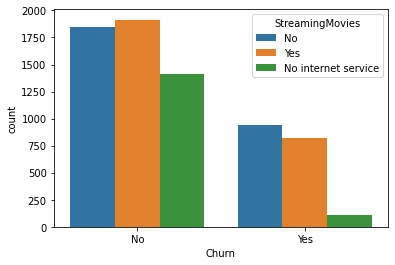

In [29]:
sns.countplot("Churn", data=data,hue="StreamingMovies")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


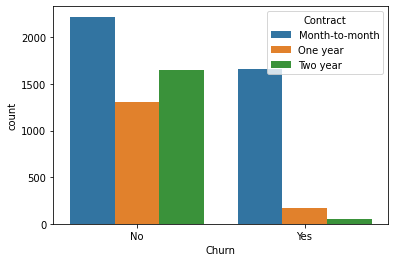

In [30]:
sns.countplot("Churn", data=data,hue="Contract")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


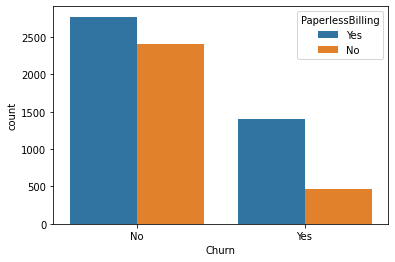

In [31]:
sns.countplot("Churn", data=data,hue="PaperlessBilling")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


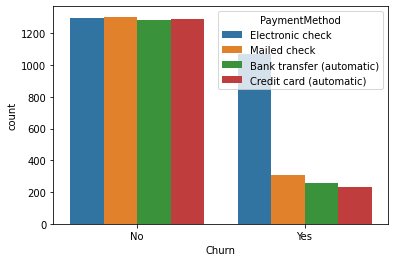

In [32]:
sns.countplot("Churn", data=data,hue="PaymentMethod")

성별, 우리는 남성과 여성 모두 동일한 수의 고객을 가지고 있는 것으로 보이며, 둘 다 같은 양의 고객을 보여준다.

시니어보다 젊은 고객들이 많다.

파트너가 있든 없든 고객은 거의 같습니다.

부양가족이 없는 고객이 있는 고객보다 더 많다

전화 서비스를 사용하지 않는 대부분의 고객들은 전화 서비스를 사용하는 고객들보다 훨씬 더 많다.

인터넷 서비스를 이용하는 고객들은 대부분 DSL이나 광섬유를 선호한다.

다중 회선, 인터넷 서비스, 온라인 보안, 온라인 백업, 기술 지원 기능에는 공통 패턴이 있습니다. 대부분의 고객은 이러한 기능을 사용하는 고객보다 이러한 기능에 액세스하지 않는 것을 선호하는 것으로 나타났습니다.

기능, 스트리밍 동영상 및 스트리밍TV에도 비슷한 막대 그래프가 있는데, 이는 이 서비스를 선호하거나 선호하지 않는 고객의 수가 동일하다는 것을 의미한다.

일반적으로 고객은 2년 또는 1년 계약과 같은 다른 유형에 비해 월별 계약을 선호한다.

마지막으로, 대부분의 고객들은 다른 어떤 형태보다 종이 없는 청구를 선호하며 전자 수표와 같은 모든 다른 형태의 은행 거래를 사용하는 것으로 보인다.


성별, 남성 고객과 여성 고객의 비율은 거의 같습니다.

시니어 고객들은 비 시니어 고객들에 비해 회사를 떠나는 경향이 더 크다.

파트너가 없는 고객은 그렇지 않은 고객에 비해 회사를 떠나는 경향이 있다.

회사를 떠나는 고객들은 부양가족이 없다. 반면에, 보여주지 않은 사람들은 회사를 그렇게 많이 떠날 것이다.

전화 서비스 및 여러 회선 범주에 걸쳐 고객은 회사를 떠나는 사람들에게 동일한 비율을 보여줍니다.

광섬유를 인터넷 서비스로 사용하는 고객은 다른 인터넷 서비스 방법에 비해 가장 높은 이직률을 보일 것이라는 점을 강조하는 것이 중요하다.

Online Security, Online Backup, Online Protection 및 Tech Support를 사용하지 않거나 사용하지 않는 고객은 Churn이 다른 그룹에 비해 더 높은 확률을 보일 것입니다.

또한 스트리밍 동영상 및 스트리밍 기능도 제공됩니다.TV는 같은 회전율을 보여준다.

종이 없는 청구서를 선호하는 고객은 그렇지 않은 고객보다 더 높은 Churn 확률을 가질 것입니다.

마지막으로 중요한 것은 회사 내 거래를 위해 전자 수표를 사용하는 사람들이 그렇지 않은 사람들보다 회사를 떠나고자 하는 큰 경향을 보일 것이라는 점이다.

In [ ]:
#https://www.kaggle.com/code/praxitelisk/telco-customer-churn-eda-ml

파트너와 자녀로 구분해서 나누기

가족단위로: 인구통계학적 원인/서비스

-싱글 (파트너/자녀 무)
-커플
-패밀리
-한부모

In [59]:
Family = [
    (data['Partner'] == 'Yes') & (data['Dependents'] == 'Yes'),
    (data['Partner'] == 'Yes') & (data['Dependents'] == 'No'),
    (data['Partner'] == 'No') & (data['Dependents'] == 'Yes'),
    (data['Partner'] == 'No') & (data['Dependents'] == 'No')
]

vals = ['Family', 'Couple', 'Single parent', 'Single']

data['Family'] = np.select(Family, vals)

In [60]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Family
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Couple
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Single
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Single
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Single
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Single


In [61]:
print(data["Family"].value_counts())

Single           3280
Family           1749
Couple           1653
Single parent     361
Name: Family, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


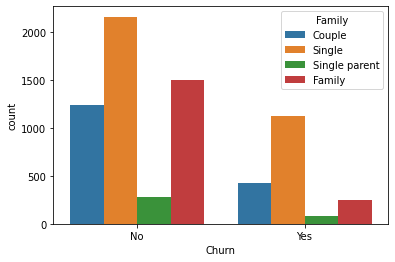

In [62]:
sns.countplot("Churn", data=data,hue="Family")